<a href="https://colab.research.google.com/github/Llucascrodrigues/Estudos_DataScience/blob/main/Estudo_LOL_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo de DataScience com dados do jogo League of legends
Qual o campeão ideal para iniciar?
quais são os fatores que facilitam um jogador jogar?
hp regeneration
attack damage


In [25]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
tabela=pd.read_csv('/content/LoL_champions.csv')
tabela.head()

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.0,0.0,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.0,0.8,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.0,0.0,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.2,0.7,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.5,0.8,62,3.75,2.125,0.625,0.625


In [101]:
for col in tabela.columns:
  print(col)

Name
Tags
Role
Range type
Resourse type
Base HP
HP per lvl
Base mana
Mana per lvl
Movement speed
Base armor
Armor per lvl
Base magic resistance
Magic resistance per lvl
Attack range
HP regeneration
HP regeneration per lvl
Mana regeneration
Mana regeneration per lvl
Attack damage
Attack damage per lvl
Attack speed per lvl
Attack speed
AS ratio


In [3]:
tabela.shape

(167, 24)

Primeira análise será de regeneração do HP

In [40]:
tabela['HP regeneration'].mean()
#na média a regeneração
#queremos então maior que a média
media_hp=tabela['HP regeneration'].mean()
print(media_hp)

6.297904191616767


In [41]:
tabela['Attack damage'].mean()
#na média o ataque
#queremos então maior que a média
media_ataque=tabela['Attack damage'].mean()
print(media_ataque)

58.8562874251497


In [9]:
tabela.value_counts('Attack damage')

,count
Attack damage,
55,17
60,16
64,11
62,11
58,11
59,11
68,10
61,8
66,8


In [7]:
tabela.value_counts('HP regeneration')

,count
HP regeneration,
5.50,26
7.00,17
8.50,16
6.00,15
7.50,13
8.00,13
6.50,11
9.00,10
3.50,8


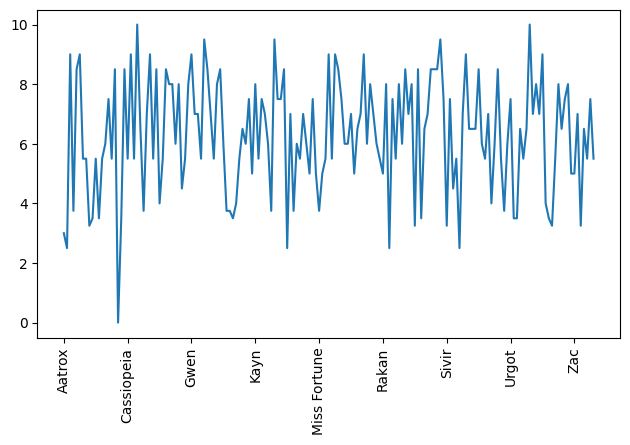

In [26]:
plt.plot(tabela['Name'],tabela['HP regeneration'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10))
plt.show()

É possivel identificar que este grafico não ajudou a identificar quais campeões são os que tem maior HP Regeneration

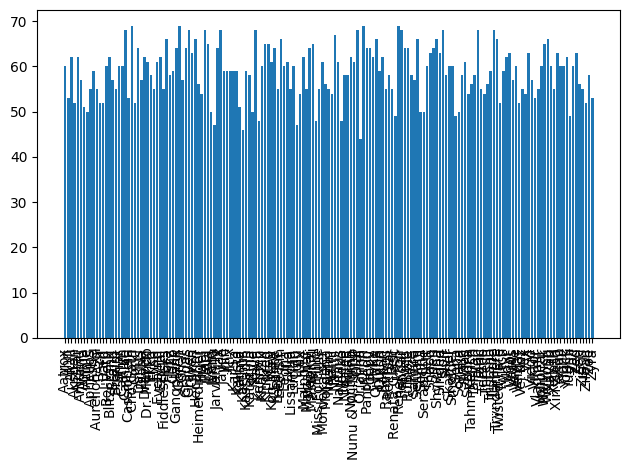

In [29]:
plt.bar(tabela['Name'],tabela['Attack damage'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Também não é uma opção

Portanto, pensei em filtrar os dados mais altos e plotar somente dos campeões com hp maior que a média

In [79]:
tabela.loc[tabela['Attack damage']>media_ataque]
tabela_damage=tabela.loc[tabela['Attack damage']>media_ataque]
tabela_damage
#filtro de campeões fortes

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.0,0.50,0.0,0.00,60,5.00,2.500,0.651,0.651
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.0,0.90,50.0,0.00,62,3.30,3.200,0.625,0.625
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.5,0.85,8.5,0.80,62,3.75,2.125,0.625,0.625
9,Ashe,"Marksman,Support","Bottom,Support",Ranged,Mana,640,101,280,35.0,325,...,600,3.5,0.55,7.0,0.65,59,2.95,3.330,0.658,0.658
13,Bel'Veth,Fighter,Jungle,Melee,NaN,610,99,60,0.0,340,...,175,6.0,0.60,0.0,0.00,60,1.50,0.000,0.850,0.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Yasuo,"Fighter,Assassin","Top,Middle,Bottom",Melee,Flow,590,110,100,0.0,345,...,175,6.5,0.90,0.0,0.00,60,3.00,3.500,0.697,0.670
157,Yone,"Fighter,Assassin","Top,Middle",Melee,Flow,620,105,500,0.0,345,...,175,7.5,0.75,0.0,0.00,60,2.00,3.500,0.625,0.625
158,Yorick,"Fighter,Tank",Top,Melee,Mana,650,114,300,60.0,340,...,175,8.0,0.80,7.5,0.75,62,5.00,2.000,0.625,0.625
160,Zac,"Tank,Fighter","Jungle,Top,Support",Melee,NaN,685,109,0,0.0,340,...,175,5.0,0.50,0.0,0.00,60,3.40,1.600,0.736,0.638


In [87]:
tabela_damage.loc[tabela_damage['HP regeneration']>media_hp]
tabela_dano_hp=tabela_damage.loc[tabela_damage['HP regeneration']>media_hp]
tabela_dano_hp
#união de hp e ataque

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.0,0.90,50.00,0.00,62,3.30,3.200,0.625,0.625
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.5,0.85,8.50,0.80,62,3.75,2.125,0.625,0.625
14,Blitzcrank,"Tank,Support",Support,Melee,Mana,600,109,267,40.0,325,...,125,7.5,0.75,8.50,0.80,62,3.50,1.130,0.625,0.625
19,Camille,"Fighter,Assassin","Top,Support",Melee,Mana,670,99,339,52.0,340,...,125,8.5,0.80,8.15,0.75,68,3.80,2.500,0.644,0.644
21,Cho'Gath,"Tank,Mage",Top,Melee,Mana,644,94,270,60.0,345,...,125,9.0,0.85,7.20,0.45,69,4.20,1.440,0.625,0.625
23,Darius,"Fighter,Tank",Top,Melee,Mana,652,114,263,58.0,340,...,175,10.0,0.95,6.60,0.35,64,5.00,1.000,0.625,0.625
26,Dr. Mundo,"Tank,Fighter",Top,Melee,NaN,613,103,0,0.0,345,...,125,7.0,0.50,0.00,0.00,61,2.50,3.300,0.670,0.625
29,Evelynn,"Assassin,Mage",Jungle,Melee,Mana,642,98,315,42.0,335,...,125,8.5,0.75,8.11,0.60,61,3.00,2.100,0.667,0.667
32,Fiora,"Fighter,Assassin",Top,Melee,Mana,620,99,300,60.0,345,...,150,8.5,0.55,8.00,0.70,66,3.30,3.200,0.690,0.690
34,Galio,"Tank,Mage","Middle,Support",Melee,Mana,632,126,500,40.0,340,...,150,8.0,0.80,9.50,0.70,59,3.50,1.500,0.625,0.625


In [90]:
tabela_dano_hp.loc[:,tabela_dano_hp.columns.isin(['Name','HP regeneration','Attack damage','Role'])]

,Name,Role,HP regeneration,Attack damage
2,Akali,"Top,Middle",9.0,62
4,Alistar,Support,8.5,62
14,Blitzcrank,Support,7.5,62
19,Camille,"Top,Support",8.5,68
21,Cho'Gath,Top,9.0,69
23,Darius,Top,10.0,64
26,Dr. Mundo,Top,7.0,61
29,Evelynn,Jungle,8.5,61
32,Fiora,Top,8.5,66
34,Galio,"Middle,Support",8.0,59


#vamos separar por posição que o campeão joga, assim podemos escolher a lane mais confortável

In [107]:
tabela_dano_hp.loc[tabela_dano_hp['Role']=='Top']
tabela_top=tabela_dano_hp.loc[tabela_dano_hp['Role']=='Top']
tabela_top
#Tabela somente dos campeões top com ataque e hp altos

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
21,Cho'Gath,"Tank,Mage",Top,Melee,Mana,644,94,270,60.0,345,...,125,9.0,0.85,7.20,0.45,69,4.20,1.44,0.625,0.625
23,Darius,"Fighter,Tank",Top,Melee,Mana,652,114,263,58.0,340,...,175,10.0,0.95,6.60,0.35,64,5.00,1.00,0.625,0.625
26,Dr. Mundo,"Tank,Fighter",Top,Melee,NaN,613,103,0,0.0,345,...,125,7.0,0.50,0.00,0.00,61,2.50,3.30,0.670,0.625
32,Fiora,"Fighter,Assassin",Top,Melee,Mana,620,99,300,60.0,345,...,150,8.5,0.55,8.00,0.70,66,3.30,3.20,0.690,0.690
36,Garen,"Fighter,Tank",Top,Melee,NaN,690,98,0,0.0,340,...,175,8.0,0.50,0.00,0.00,69,4.50,3.65,0.625,0.625
40,Gwen,Fighter,Top,Melee,Mana,620,115,330,40.0,340,...,150,9.0,0.90,7.50,0.70,63,3.00,2.25,0.690,0.690
44,Illaoi,"Fighter,Tank",Top,Melee,Mana,656,115,350,60.0,350,...,125,9.5,0.80,7.50,0.75,68,5.00,2.50,0.625,0.625
66,K'Sante,"Tank,Fighter",Top,Melee,Mana,625,120,320,60.0,330,...,175,9.5,1.00,7.00,1.00,64,3.50,2.50,0.625,0.625
85,Nasus,"Fighter,Tank",Top,Melee,Mana,631,104,326,62.0,350,...,125,9.0,0.90,7.45,0.50,67,4.00,3.48,0.638,0.638
92,Olaf,"Fighter,Tank",Top,Melee,Mana,645,119,316,50.0,350,...,125,6.5,0.60,7.50,0.60,68,4.70,2.70,0.694,0.694


In [92]:
tabela_dano_hp.loc[tabela_dano_hp['Role']=='Jungle']
tabela_jungle=tabela_dano_hp.loc[tabela_dano_hp['Role']=='Jungle']
tabela_jungle
#Tabela somente dos campeões jungle com ataque e hp altos

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
29,Evelynn,"Assassin,Mage",Jungle,Melee,Mana,642,98,315,42.0,335,...,125,8.5,0.75,8.11,0.60,61,3.00,2.1,0.667,0.667
39,Graves,Marksman,Jungle,Ranged,Mana,625,106,325,40.0,340,...,425,8.0,0.70,8.00,0.70,68,4.00,3.0,0.475,0.490
41,Hecarim,"Fighter,Tank",Jungle,Melee,Mana,625,99,280,40.0,345,...,175,7.0,0.75,7.00,0.80,66,3.70,2.5,0.670,0.670
48,Jarvan IV,"Fighter,Tank",Jungle,Melee,Mana,640,104,300,55.0,340,...,175,8.0,0.70,6.50,0.45,64,3.00,2.5,0.658,0.658
60,Kayn,"Fighter,Assassin",Jungle,Melee,Mana,655,109,410,50.0,340,...,175,8.0,0.75,11.50,0.95,68,3.30,2.7,0.669,0.669
62,Kha'Zix,Assassin,Jungle,Melee,Mana,643,99,327,40.0,350,...,125,7.5,0.75,7.59,0.50,60,3.10,2.7,0.668,0.668
63,Kindred,Marksman,Jungle,Ranged,Mana,610,104,300,35.0,325,...,500,7.0,0.55,7.00,0.40,65,3.25,3.5,0.625,0.625
68,Lee Sin,"Fighter,Assassin",Jungle,Melee,Energy,645,108,200,0.0,345,...,125,7.5,0.70,50.00,0.00,66,3.70,3.0,0.651,0.651
78,Master Yi,"Assassin,Fighter",Jungle,Melee,Mana,669,105,251,42.0,355,...,175,7.5,0.65,7.25,0.45,65,2.50,2.5,0.679,0.679
90,Nocturne,"Fighter,Assassin",Jungle,Melee,Mana,655,109,275,35.0,345,...,125,7.0,0.75,7.00,0.45,62,2.60,2.7,0.721,0.721


In [104]:
tabela_dano_hp.loc[tabela_dano_hp['Role']=='Support']
tabela_sup=tabela_dano_hp.loc[tabela_dano_hp['Role']=='Support']
tabela_sup
#Tabela somente dos campeões Support com ataque e hp altos

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.5,0.85,8.50,0.8,62,3.75,2.125,0.625,0.625
14,Blitzcrank,"Tank,Support",Support,Melee,Mana,600,109,267,40.0,325,...,125,7.5,0.75,8.50,0.8,62,3.50,1.130,0.625,0.625
69,Leona,"Tank,Support",Support,Melee,Mana,646,101,302,40.0,335,...,125,8.5,0.85,6.00,0.8,60,3.00,2.900,0.625,0.625
86,Nautilus,"Tank,Support",Support,Melee,Mana,646,100,400,47.0,325,...,175,8.5,0.55,8.65,0.5,61,3.30,1.000,0.706,0.612
97,Pyke,"Support,Assassin",Support,Melee,Mana,670,110,415,50.0,330,...,150,7.0,0.50,8.00,1.0,62,2.00,2.500,0.667,0.667


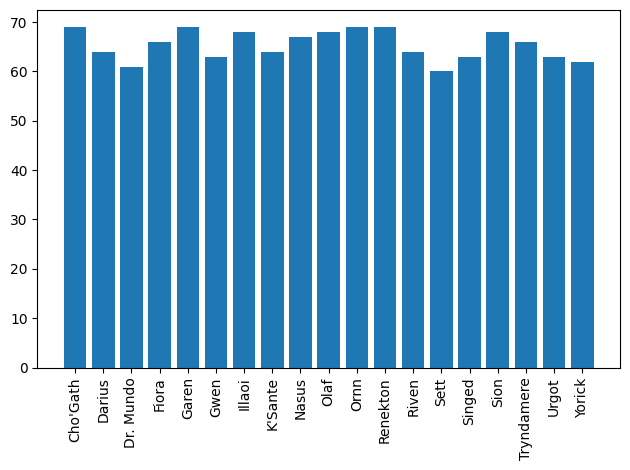

In [114]:
plt.bar(tabela_top['Name'],tabela_top['Attack damage'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

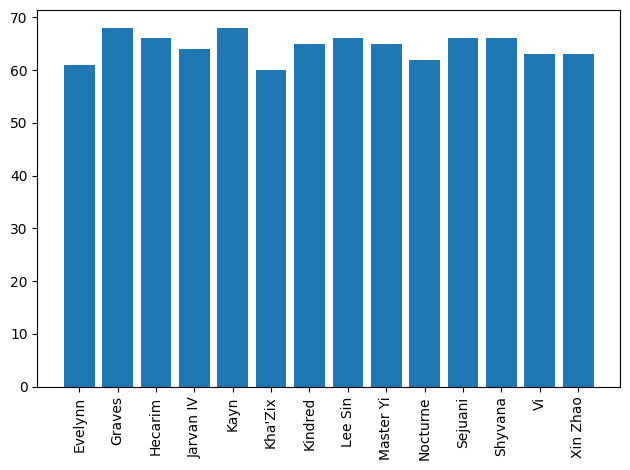

In [115]:
plt.bar(tabela_jungle['Name'],tabela_jungle['Attack damage'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()